In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
#Getting the list of classes

def get_classname_from_string(string):
    if(string.endswith(".jpg")):
        string = string[:-4]
    words = string.split()
    current_class = ''.join(map(lambda c: '' if c in '0123456789' else c, words[0]))
    current_class = current_class[:-1]
    return current_class

classes = set()
with open('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/annotations/annotations/list.txt') as annotations_list:
    for line in annotations_list:
        if line[0]!="#":
            current_class = get_classname_from_string(line)
            classes.add(current_class)


classes_dictionary = {k: v for v, k in enumerate(classes)}# classname--> int 
classnumber_to_name_dict = {v: k for k, v in classes_dictionary.items()} # int --> classname
#print(classes_dictionary)

In [3]:
print(classes_dictionary)
print(classnumber_to_name_dict)

{'shiba_inu': 0, 'scottish_terrier': 1, 'german_shorthaired': 2, 'japanese_chin': 3, 'British_Shorthair': 4, 'pug': 5, 'Bombay': 6, 'Egyptian_Mau': 7, 'chihuahua': 8, 'keeshond': 9, 'Birman': 10, 'Abyssinian': 11, 'Siamese': 12, 'saint_bernard': 13, 'basset_hound': 14, 'great_pyrenees': 15, 'Sphynx': 16, 'wheaten_terrier': 17, 'Ragdoll': 18, 'american_bulldog': 19, 'newfoundland': 20, 'Bengal': 21, 'pomeranian': 22, 'staffordshire_bull_terrier': 23, 'samoyed': 24, 'leonberger': 25, 'yorkshire_terrier': 26, 'Maine_Coon': 27, 'Persian': 28, 'boxer': 29, 'english_setter': 30, 'havanese': 31, 'Russian_Blue': 32, 'american_pit_bull_terrier': 33, 'beagle': 34, 'english_cocker_spaniel': 35, 'miniature_pinscher': 36}
{0: 'shiba_inu', 1: 'scottish_terrier', 2: 'german_shorthaired', 3: 'japanese_chin', 4: 'British_Shorthair', 5: 'pug', 6: 'Bombay', 7: 'Egyptian_Mau', 8: 'chihuahua', 9: 'keeshond', 10: 'Birman', 11: 'Abyssinian', 12: 'Siamese', 13: 'saint_bernard', 14: 'basset_hound', 15: 'great_

In [7]:
filenames = os.listdir("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/")

#The dataset turned out to have some images with incorrect extensions causing opencv to raise exceptions, or worse report errors without throwing an exception...
corrupted_images_list = ["Egyptian_Mau_139.jpg","Egyptian_Mau_145.jpg","Egyptian_Mau_177.jpg","Egyptian_Mau_191.jpg","Egyptian_Mau_167.jpg","Abyssinian_34.jpg","beagle_25.jpg","beagle_25.jpg","chihuahua_14.jpg","Persian_10.jpg","beagle_116.jpg","chihuahua_63.jpg","chihuahua_116.jpg"]
class_files = dict() # Dictionary classname--> file paths
for f in filenames:
    if f in corrupted_images_list:
        continue
    file_class = get_classname_from_string(f)
    if f.endswith(".mat"):
        continue
    if file_class in class_files:
        class_files[file_class].append(f)
    else:
        class_files[file_class] = [f]
#print(class_files)

In [8]:
#There are mat files in this dataset for some reason so we gotta get just the jpgs
from random import sample
import math
import shutil
TRAIN_PERCENT = 0.75
TEST_PERCENT = 0.25

TRAIN_X = []
TEST_X = []
TRAIN_Y = []
TEST_Y = []
#Creating test split
def create_test_split():
    for key, file_list in class_files.items():
        class_number = classes_dictionary[key]
        file_list_size = len(file_list)
        number_to_take = math.floor(file_list_size*TRAIN_PERCENT)
        train_sample = sample(file_list,number_to_take)
        test_sample = [f for f in file_list if f not in train_sample]
        TRAIN_X.extend(train_sample)
        TEST_X.extend(test_sample)
        TRAIN_Y.extend([class_number]*len(train_sample))
        TEST_Y.extend([class_number]*len(test_sample))
        """
        for f in train_sample:
            shutil.copy(os.path.join("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/",f),os.path.join("/kaggle/working/train",key,f))
        for f in test_sample:
            shutil.copy(os.path.join("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/",f),os.path.join("/kaggle/working/test",key,f))
        """
        #print(f"Train samples in class {f}: {len(train_sample)}. Test samples in class {f}: {len(test_sample)}")
create_test_split()

In [9]:
print(TEST_X[::60])
print(TEST_Y[::60])

['american_pit_bull_terrier_16.jpg', 'leonberger_187.jpg', 'english_cocker_spaniel_41.jpg', 'Siamese_69.jpg', 'boxer_27.jpg', 'american_bulldog_116.jpg', 'Sphynx_222.jpg', 'Egyptian_Mau_131.jpg', 'Birman_109.jpg', 'english_setter_156.jpg', 'pug_39.jpg', 'yorkshire_terrier_124.jpg', 'Abyssinian_14.jpg', 'havanese_39.jpg', 'miniature_pinscher_133.jpg', 'basset_hound_113.jpg', 'scottish_terrier_131.jpg', 'Bombay_173.jpg', 'British_Shorthair_116.jpg', 'Maine_Coon_119.jpg', 'staffordshire_bull_terrier_10.jpg', 'japanese_chin_151.jpg', 'shiba_inu_158.jpg', 'wheaten_terrier_144.jpg', 'beagle_181.jpg', 'great_pyrenees_165.jpg', 'pomeranian_16.jpg', 'samoyed_179.jpg', 'german_shorthaired_177.jpg', 'Ragdoll_74.jpg', 'Russian_Blue_76.jpg']
[33, 25, 35, 12, 29, 19, 16, 7, 10, 30, 5, 26, 11, 31, 36, 14, 1, 6, 4, 27, 23, 3, 0, 17, 34, 15, 22, 24, 2, 18, 32]


In [10]:
#One hot encoding labels
from keras.utils import to_categorical
TRAIN_Y = np.array(TRAIN_Y)
TEST_Y = np.array(TEST_Y)
one_hot_encoded_train = to_categorical(TRAIN_Y)
one_hot_encoded_test = to_categorical(TEST_Y)


#Test
print(one_hot_encoded_train[::100])
inv = np.argmax(one_hot_encoded_test[0])
print(inv)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
33


In [11]:
#Processing images
import cv2
images_directory = "/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/"
X_TRAIN_IMAGES = []
X_TEST_IMAGES = []

# Size of images after resizing
pixels_x = 250 
pixels_y = 250

def read_and_process(filename):
    #print(filename)
    full_filepath = os.path.join(images_directory,filename)
    image_read = cv2.imread(full_filepath,cv2.IMREAD_COLOR)
    resized_image = cv2.resize(image_read,(pixels_x,pixels_y),interpolation=cv2.INTER_LINEAR)
    return resized_image
for f in TRAIN_X:
    image = read_and_process(f)
    X_TRAIN_IMAGES.append(image)
for f in TEST_X:
    image = read_and_process(f)
    X_TEST_IMAGES.append(image)
X_TRAIN_IMAGES = np.array(X_TRAIN_IMAGES)
X_TEST_IMAGES = np.array(X_TEST_IMAGES)

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


In [12]:
del TRAIN_X
del TEST_X
del filenames
gc.collect()

75

In [13]:
print(X_TRAIN_IMAGES.shape)
print(TRAIN_Y.shape)

print(X_TEST_IMAGES.shape)
print(TEST_Y.shape)

(5531, 250, 250, 3)
(5531,)
(1847, 250, 250, 3)
(1847,)


In [14]:
import keras
from keras import layers
from keras import models
from keras import optimizers


In [ ]:
#CNN setup
def create_model():
    inputs = layers.Input(shape=(pixels_x,pixels_y,3))
    conv_1 = layers.Conv2D(32,(3,3),activation="relu")(inputs)
    pool_1 = layers.MaxPooling2D((2,2))(conv_1)
    
    conv_2 = layers.Conv2D(32,(3,3),activation="relu")(pool_1)
    pool_2 = layers.MaxPooling2D((2,2))(conv_2)
    
    conv_3 = layers.Conv2D(64,(3,3),activation="relu")(pool_2)
    pool_3 = layers.MaxPooling2D((2,2))(conv_3)
    
    flatten = layers.Flatten()(pool_3)
    dropout_1 = layers.Dropout(0.3)(flatten)
    dense_1 = layers.Dense(96, activation="relu")(dropout_1)
    dropout_2 = layers.Dropout(0.5)(dense_1)
    dense_2 = layers.Dense(64, activation="relu")(dropout_2)
    outputs = layers.Dense(37,activation="softmax")(dense_2)
    
    return keras.Model(inputs=inputs, outputs=outputs)

my_model = create_model()
my_model.summary()

In [ ]:
#Getting data for fitting
batch_size = 64
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=50,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_TRAIN_IMAGES,one_hot_encoded_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_TEST_IMAGES, one_hot_encoded_test, batch_size=batch_size)

In [ ]:
#Training


my_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizers.Adam(lr=0.001),metrics=[keras.metrics.CategoricalAccuracy()])
history = my_model.fit_generator(train_generator,
                             steps_per_epoch=len(TRAIN_Y) // batch_size,
                             epochs=64,
                             validation_data = val_generator,
                             validation_steps = len(TEST_Y) // batch_size,
                             shuffle =True)

my_model.save_weights('model_weights.h5')
my_model.save('model_keras.h5')

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 39ms/step


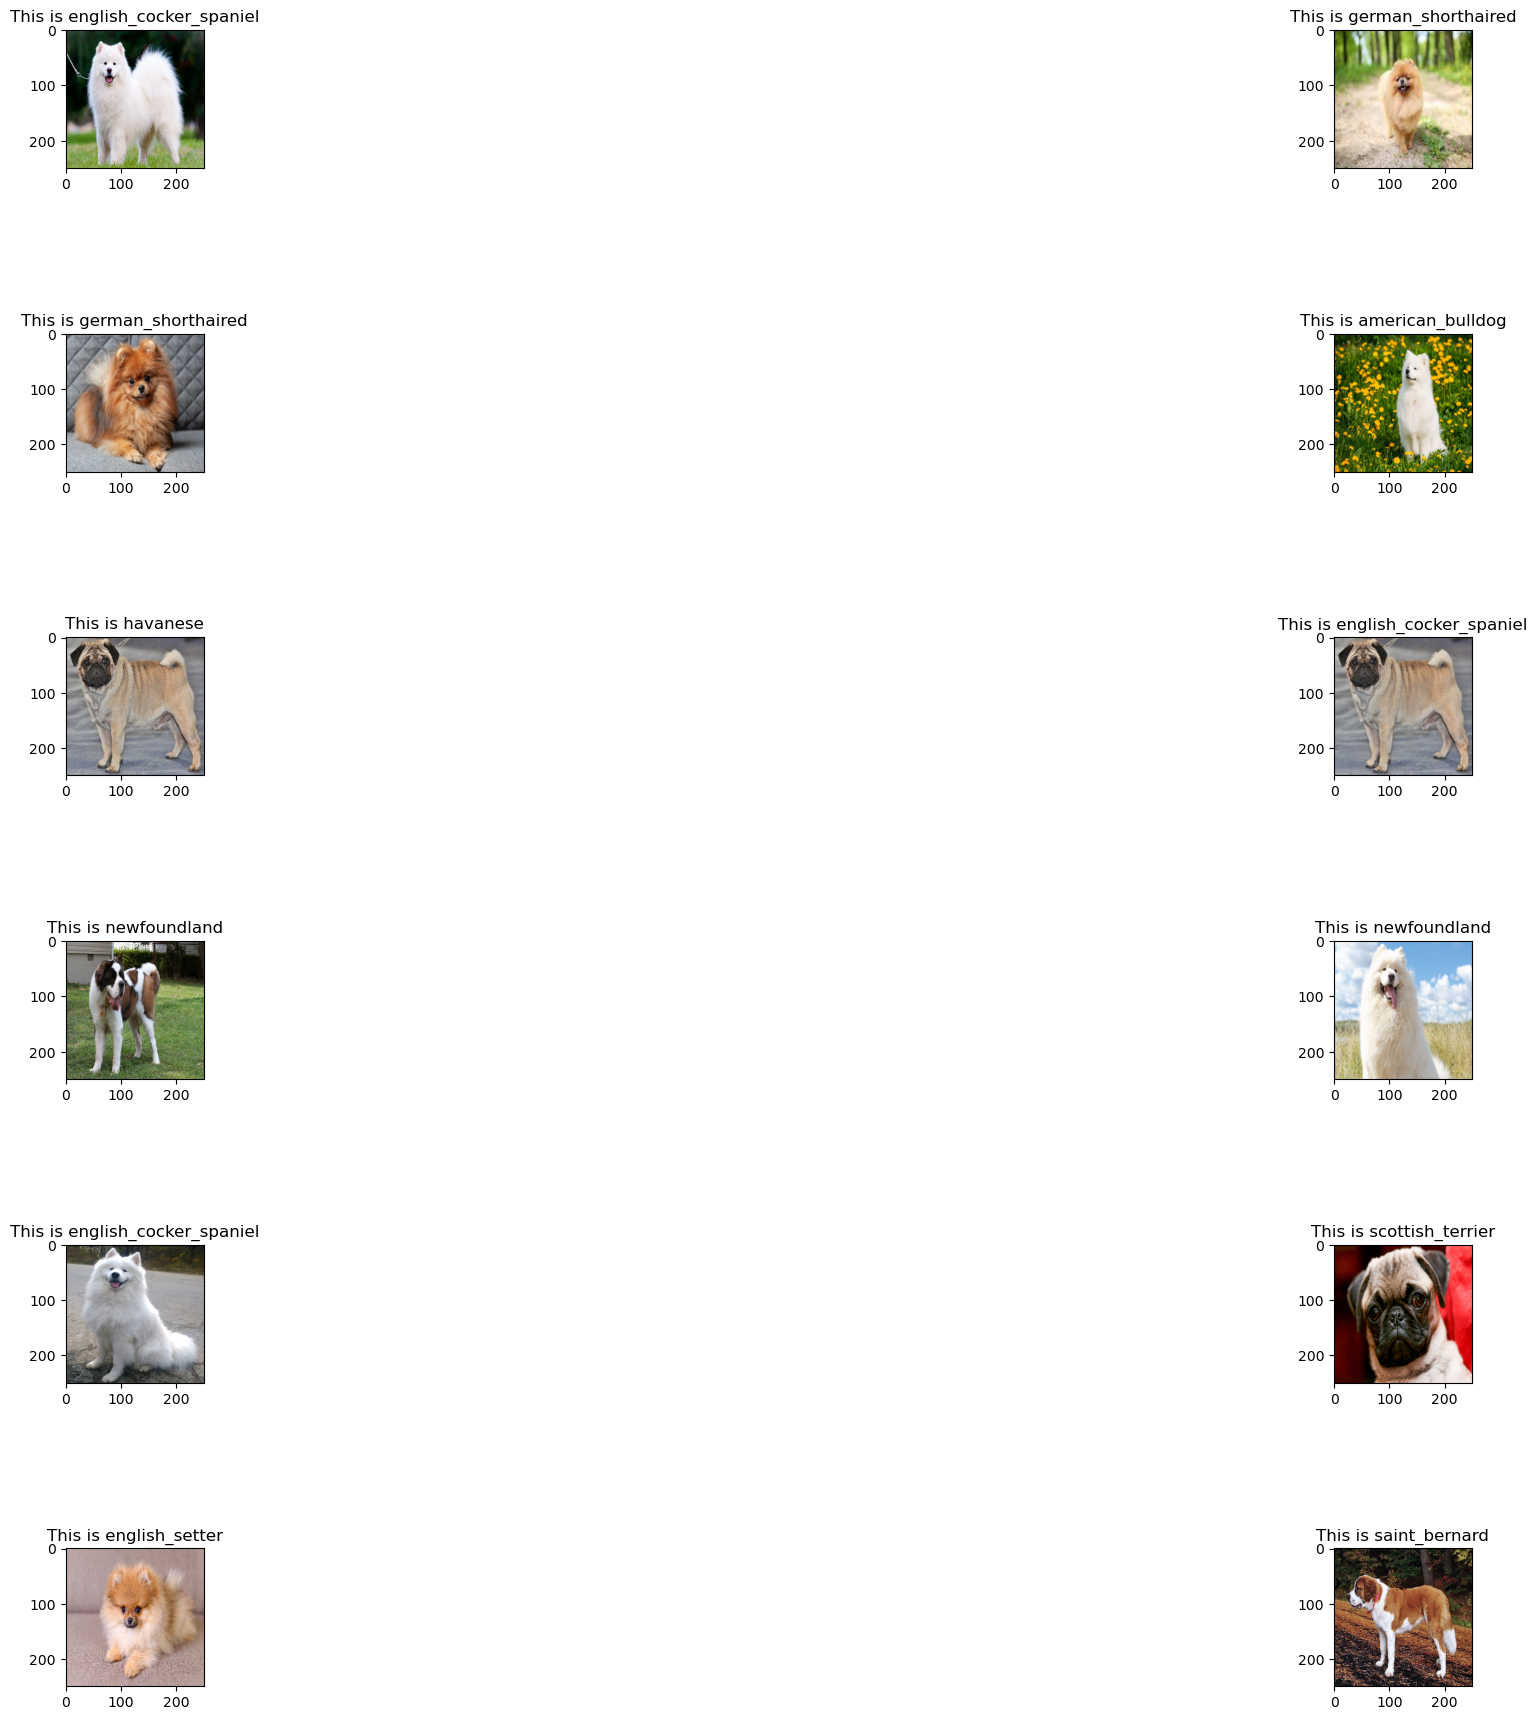

In [29]:
import matplotlib.pyplot as plt
loaded_model = keras.models.load_model("/kaggle/input/custom-trained-cat-dog-breed-classifier/model_keras.h5")
images_directory = "/kaggle/input/some-validation-dogs"
resized_val_images = []
filenames = os.listdir(images_directory)
for f in filenames:
    resized_val_images.append(read_and_process(f))
test_datagen = ImageDataGenerator(rescale=1./255)

x = np.array(resized_val_images)
i = 0
text_labels = []
plt.figure(figsize=(30,20))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.2)
for batch in test_datagen.flow(x,batch_size=1):
    pred = loaded_model.predict(batch)
    label = classnumber_to_name_dict[np.argmax(pred)]
    text_labels.append(label)
    image_to_show =cv2.cvtColor(resized_val_images[i], cv2.COLOR_BGR2RGB) # Opencv uses BGR instead of RGB...
    plt.subplot(7, 2,i+1)
    plt.title('This is ' + text_labels[i])
    imgplot = plt.imshow(image_to_show)
    i+=1
    if i % 12 == 0:
        break
        
plt.show()